#### Saleh Alkhalifa, CS-6120

# **CS 6120: Natural Language Processing - Prof. Ahmad Uzair** 

### **Assignment 3: n-gram Language Models, Word Sense disambiguation(LSA using SVD), LSTM**

### **Total points: 100**


# Q1. Latent Semantic Analysis (35 Points) 


 - A. Singular Value Decomposition (SVD) based distributed representation of text and documents. You can use python libraries for matrix decomposition (scipy). To demonstrate your work, use the example dataset (Table 2) of "R. A. Harshman (1990). Indexing by latent semantic analysis. Journal of the American society for information science". (10 Points)

 - B. Visualize (2-D) the documents and terms using library of your choice. (10 Points)

 - C. Implement a function that converts a query string to distributed representation and retrieves relevent documents. Visualize the the results as shown in Fig 1 of the paper. (10 Points)

## <CENTER>Task-1 (10 Points)

### Input data

In [1]:
#Dataset
c1 = 'Computer vision is a field of artificial intelligence that focuses on enabling computers to interpret and understand visual information from the world.'
c2 = 'One of the most prominent applications of computer vision is in autonomous vehicles, where it helps the vehicle "see" and make decisions based on its surroundings.'
c3 = 'Computer vision is also used in facial recognition technology, which has become controversial due to concerns over privacy and potential misuse.'
c4 = 'In the medical field, computer vision is used to assist doctors in diagnosing diseases and analyzing medical images such as x-rays and MRIs.'
c5 = 'Computer vision is also used in security and surveillance systems, where it can detect and recognize suspicious activities or individuals.'
m1 = 'Cybersecurity refers to the practices and technologies used to protect computer systems, networks, and data from unauthorized access, use, disclosure, disruption, modification, or destruction.'
m2 = 'One of the most important applications of cybersecurity is in safeguarding sensitive data and personal information, such as financial data or healthcare records.'
m3 = 'Cybersecurity is also essential in protecting critical infrastructure, such as power grids and transportation systems, from cyber attacks that could cause significant disruptions.'
m4 = 'In the healthcare industry, cybersecurity is used to protect medical devices and prevent unauthorized access to patient data.'
documents = [c1, c2, c3, c4, c5, m1, m2, m3, m4]

### Perform preprocessing of documents

In the below cell remove punctuations and lowercase the message

In [2]:
# TASK CELL
import re

def preprocess(message):
    '''
    Input:
        message: a string containing a message.
    Output:
        preprocessed_message_list: a list of words containing the processed message. 
    '''
    
    # Remove punctuation
    message = re.sub('[^A-Za-z0-9]+', " ", message)
    
    # Remove multiple spaces
    message = re.sub(' +', " ", message)
    
    # Lower Case
    message = message.lower()
    
    # Convert to List
    preprocessed_message_list = message.split(" ")
    
    # Remove spaces
    preprocessed_message_list = list(filter(None, preprocessed_message_list))
   
    # Return list
    return preprocessed_message_list

In [3]:
preprocess(c2)

['one',
 'of',
 'the',
 'most',
 'prominent',
 'applications',
 'of',
 'computer',
 'vision',
 'is',
 'in',
 'autonomous',
 'vehicles',
 'where',
 'it',
 'helps',
 'the',
 'vehicle',
 'see',
 'and',
 'make',
 'decisions',
 'based',
 'on',
 'its',
 'surroundings']

### Verify preprocessed data

In [4]:
for sent in documents:
    print(preprocess(sent))

['computer', 'vision', 'is', 'a', 'field', 'of', 'artificial', 'intelligence', 'that', 'focuses', 'on', 'enabling', 'computers', 'to', 'interpret', 'and', 'understand', 'visual', 'information', 'from', 'the', 'world']
['one', 'of', 'the', 'most', 'prominent', 'applications', 'of', 'computer', 'vision', 'is', 'in', 'autonomous', 'vehicles', 'where', 'it', 'helps', 'the', 'vehicle', 'see', 'and', 'make', 'decisions', 'based', 'on', 'its', 'surroundings']
['computer', 'vision', 'is', 'also', 'used', 'in', 'facial', 'recognition', 'technology', 'which', 'has', 'become', 'controversial', 'due', 'to', 'concerns', 'over', 'privacy', 'and', 'potential', 'misuse']
['in', 'the', 'medical', 'field', 'computer', 'vision', 'is', 'used', 'to', 'assist', 'doctors', 'in', 'diagnosing', 'diseases', 'and', 'analyzing', 'medical', 'images', 'such', 'as', 'x', 'rays', 'and', 'mris']
['computer', 'vision', 'is', 'also', 'used', 'in', 'security', 'and', 'surveillance', 'systems', 'where', 'it', 'can', 'dete

##### Expected Output
```CPP
['computer', 'vision', 'is', 'a', 'field', 'of', 'artificial', 'intelligence', 'that', 'focuses', 'on', 'enabling', 'computers', 'to', 'interpret', 'and', 'understand', 'visual', 'information', 'from', 'the', 'world']
['one', 'of', 'the', 'most', 'prominent', 'applications', 'of', 'computer', 'vision', 'is', 'in', 'autonomous', 'vehicles', 'where', 'it', 'helps', 'the', 'vehicle', '"see"', 'and', 'make', 'decisions', 'based', 'on', 'its', 'surroundings']
['computer', 'vision', 'is', 'also', 'used', 'in', 'facial', 'recognition', 'technology', 'which', 'has', 'become', 'controversial', 'due', 'to', 'concerns', 'over', 'privacy', 'and', 'potential', 'misuse']
['in', 'the', 'medical', 'field', 'computer', 'vision', 'is', 'used', 'to', 'assist', 'doctors', 'in', 'diagnosing', 'diseases', 'and', 'analyzing', 'medical', 'images', 'such', 'as', 'x', 'rays', 'and', 'MRIs']
['computer', 'vision', 'is', 'also', 'used', 'in', 'security', 'and', 'surveillance', 'systems', 'where', 'it', 'can', 'detect', 'and', 'recognize', 'suspicious', 'activities', 'or', 'individuals']
['Cybersecurity', 'refers', 'to', 'the', 'practices', 'and', 'technologies', 'used', 'to', 'protect', 'computer', 'systems', 'networks', 'and', 'data', 'from', 'unauthorized', 'access', 'use', 'disclosure', 'disruption', 'modification', 'or', 'destruction']
['one', 'of', 'the', 'most', 'important', 'applications', 'of', 'cybersecurity', 'is', 'in', 'safeguarding', 'sensitive', 'data', 'and', 'personal', 'information', 'such', 'as', 'financial', 'data', 'or', 'healthcare', 'records']
['Cybersecurity', 'is', 'also', 'essential', 'in', 'protecting', 'critical', 'infrastructure', 'such', 'as', 'power', 'grids', 'and', 'transportation', 'systems', 'from', 'cyber', 'attacks', 'that', 'could', 'cause', 'significant', 'disruptions']
['in', 'the', 'healthcare', 'industry', 'cybersecurity', 'is', 'used', 'to', 'protect', 'medical', 'devices', 'and', 'prevent', 'unauthorized', 'access', 'to', 'patient', 'data']
```

### Assign names to document names
In the below cell create a list of document names. It will be later used to visualize documents

In [5]:
def createDocName(documents):
    '''
    Input:
        documents: list of documents.
    Output:
        doc_names: a list of document names. 

    '''
    doc_names = ['c1', 'c2', 'c3', 'c4', 'c5', 'm1', 'm2', 'm3', 'm4']

    return doc_names


In [6]:
docName = createDocName(documents)
print(docName)

['c1', 'c2', 'c3', 'c4', 'c5', 'm1', 'm2', 'm3', 'm4']


##### Expected Output
``` CPP
['c1', 'c2', 'c3', 'c4', 'c5', 'm1', 'm2', 'm3', 'm4']
```

### Words to Index mapping
Retrieve words from documents and create map of word and associate index to it

In [8]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [23]:
def build_word_to_ix(documents, stopwords=None):
    '''
    Input:
        documents: list of documents
        stopwords: list of stopwords
    Output:
        doc_names: map of words and assoicated index. Make sure to remove words which occur in less than 2 documents 

    '''
    # Instantiate dicts
    word_to_ix = {}
    doc_count = {}
    
    # Iterate over documents
    for i, doc in enumerate(documents):
        
        # Preprocess document using previous script
        words = preprocess(doc)
        
        # Get unique words from the list
        unique_words = set(words)
        
        # Iterate over the words
        for word in unique_words:
            # Stop word conditional
            if stopwords and word in stopwords:
                continue
                
            # Conditional to add
            if word not in doc_count:
                doc_count[word] = set()
            doc_count[word].add(i)
            
    # Remove words that occur in less than 2 documents
    doc_count = {k: v for k, v in doc_count.items() if len(v) > 1}
    
    for i, word in enumerate(doc_count.keys()):
        word_to_ix[word] = i
        
    return word_to_ix

In [24]:
word_to_ix = build_word_to_ix(documents, stop_words)
print(word_to_ix)

{'field': 0, 'information': 1, 'computer': 2, 'vision': 3, 'applications': 4, 'one': 5, 'used': 6, 'also': 7, 'medical': 8, 'systems': 9, 'unauthorized': 10, 'access': 11, 'protect': 12, 'cybersecurity': 13, 'data': 14, 'healthcare': 15}


##### Expected Output
Note: the index value for each token could be different in your implementation 
```CPP
{'field': 0, 'vision': 1, 'information': 2, 'computer': 3, 'one': 4, 'applications': 5, 'also': 6, 'used': 7, 'medical': 8, 'systems': 9, 'data': 10, 'unauthorized': 11, 'access': 12, 'cybersecurity': 13, 'protect': 14, 'healthcare': 15}
```

### Document-Terms count matrix

In [26]:
import numpy as np

def build_td_matrix(documents, word_to_ix):
    '''
    Input:
        documents: list of documents.
        word_to_ix: {word, index} map
    Output:
        td_matrix: matrix of count of words in documents, each row 
            represent a word and each column represent a document

    '''
    
    # Instantiate zeros matrix
    td_matrix = np.zeros((len(word_to_ix), len(documents)))

    # Iterate over the documents
    for idx, sentence in enumerate(documents):
    
        # Preprocess and split words
        sentence = preprocess(sentence)
    
        # for each word, check if its in word_to_ix
        for word in sentence:
            if word in word_to_ix:
                # Increment if included
                td_matrix[word_to_ix[word], idx] = td_matrix[word_to_ix[word], idx]+1
    
    return td_matrix

In [27]:
X = build_td_matrix(documents, word_to_ix)
print(X)

[[1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 2. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 2. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1.]]


##### Expected Output
Note: the order of rows could be different in your implementation as it is based on the indexing of the tokens done in build_word_to_ix
```CPP
[[1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0. 1.]
 [0. 0. 0. 2. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 2. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1.]]
 ```

### Singular Value Decomposition
Perform singular value decomposition of count matrix into term singular vector matrix, singular value matrix and document singular vector matrix
- To perform the singular value decompostion please check tutorial:
https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html

In [28]:
def svd(documents, word_to_ix, rank):
    '''
    Input:
        documents: list of documents.
        word_to_ix: {word, index} map
        rank: number of colums/rows to retain in decomposed matrix
    Output:
        Uk: term singular vector matrix
        Sk: singular value matrix
        Vk_t: transpose of document singular vector matrix
    '''
    
    # Insantiate Matrix using previous function
    X = build_td_matrix(documents, word_to_ix)
    
    # Apply SVD based on documentation
    u, s, vh = np.linalg.svd(X)
    
    # Reshape outputs to fit required shape
    Uk, Sk, Vk_t = u[:,:rank], np.diag(s[:rank]), np.dstack((vh[0],vh[1]))[0]
    
    return Uk, Sk, Vk_t

In [29]:
Uk, Sk, Vk_t = svd(documents, word_to_ix, 2)
print(Uk)
print(Sk)
print(Vk_t)

[[-0.12717294  0.20278638]
 [-0.11470385 -0.06974269]
 [-0.40776071  0.39028813]
 [-0.30025142  0.45516076]
 [-0.11406442 -0.09695837]
 [-0.11406442 -0.09695837]
 [-0.41909101  0.14444841]
 [-0.1610913   0.18784146]
 [-0.26503675  0.13251736]
 [-0.20868502  0.02493571]
 [-0.20656126 -0.17503165]
 [-0.20656126 -0.17503165]
 [-0.20656126 -0.17503165]
 [-0.3086385  -0.33652293]
 [-0.34760786 -0.47741341]
 [-0.16957527 -0.26134991]]
[[4.63682644 0.        ]
 [0.         3.4660758 ]]
[[-0.20485755  0.28230559]
 [-0.2018926   0.18797401]
 [-0.27781813  0.33979025]
 [-0.3848213   0.42056737]
 [-0.32282413  0.34698447]
 [-0.49850192 -0.22485343]
 [-0.3270043  -0.52403905]
 [-0.14631016 -0.03570198]
 [-0.4592868  -0.38181953]]


##### Expected Output
Note: the order of rows could be different in your implementation as it is based on the indexing of the tokens done in build_word_to_ix
```CPP 
[[-0.12717294  0.20278638]
 [-0.30025142  0.45516076]
 [-0.11470385 -0.06974269]
 [-0.40776071  0.39028813]
 [-0.11406442 -0.09695837]
 [-0.11406442 -0.09695837]
 [-0.1610913   0.18784146]
 [-0.41909101  0.14444841]
 [-0.26503675  0.13251736]
 [-0.20868502  0.02493571]
 [-0.34760786 -0.47741341]
 [-0.20656126 -0.17503165]
 [-0.20656126 -0.17503165]
 [-0.3086385  -0.33652293]
 [-0.20656126 -0.17503165]
 [-0.16957527 -0.26134991]]
[[4.63682644 0.        ]
 [0.         3.4660758 ]]
[[-0.20485755  0.28230559]
 [-0.2018926   0.18797401]
 [-0.27781813  0.33979025]
 [-0.3848213   0.42056737]
 [-0.32282413  0.34698447]
 [-0.49850192 -0.22485343]
 [-0.3270043  -0.52403905]
 [-0.14631016 -0.03570198]
 [-0.4592868  -0.38181953]]
 ```

## <CENTER>Task-2 (10 Points)

### Visualize documents in 2D space

In [30]:
#Visualize documents and print coordinates

In [31]:
print(Vk_t[:,1])

[ 0.28230559  0.18797401  0.33979025  0.42056737  0.34698447 -0.22485343
 -0.52403905 -0.03570198 -0.38181953]


In [32]:
print(list(Vk_t[:,1]))

[0.2823055896544668, 0.1879740062511464, 0.3397902468946739, 0.42056737349036843, 0.34698446576097886, -0.22485343260914267, -0.5240390546984037, -0.035701979310270214, -0.38181952763444904]


In [33]:
list(Vk_t[:,0])

[-0.20485755174016054,
 -0.20189260174249035,
 -0.27781812630383496,
 -0.384821296267465,
 -0.3228241278377758,
 -0.49850191940256217,
 -0.32700429857251795,
 -0.14631016162914728,
 -0.45928679890632584]

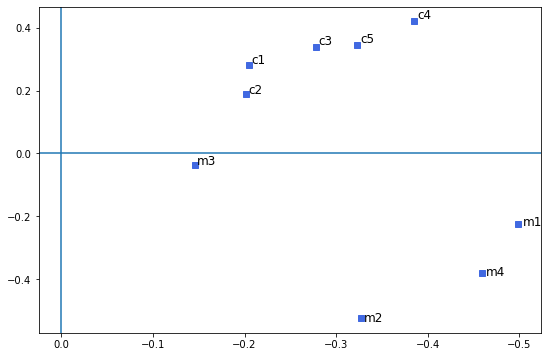

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9,6))
plt.gca().invert_xaxis()
plt.axhline(0)
plt.axvline(0)

for i in range (0, len(Vk_t)):
    x = Vk_t[i][0]
    y = Vk_t[i][1]
    plt.plot(x, y, 's', color='royalblue')
    plt.text(x * 1.01, y*1.02, docName[i], fontsize=12)



In [46]:
Vk_t

array([[-0.20485755,  0.28230559],
       [-0.2018926 ,  0.18797401],
       [-0.27781813,  0.33979025],
       [-0.3848213 ,  0.42056737],
       [-0.32282413,  0.34698447],
       [-0.49850192, -0.22485343],
       [-0.3270043 , -0.52403905],
       [-0.14631016, -0.03570198],
       [-0.4592868 , -0.38181953]])

##### Expected
```CPP
[[-0.94988891  0.97849257]
 [-0.93614095  0.65153215]
 [-1.28819443  1.17773875]
 [-1.78434956  1.4577184 ]
 [-1.49687945  1.20267446]
 [-2.31146688 -0.77935904]
 [-1.51626218 -1.81635909]
 [-0.67841483 -0.12374577]
 [-2.12963317 -1.32341543]]
```
![images/image.png](attachment:9df44069-ca33-481c-856c-0ca163d59c10.png)

![images/image.png](images/image.png)

### Visualize terms in 2D space

In [47]:
#Visualize terms and print coordinates

In [48]:
word_to_ix

{'field': 0,
 'information': 1,
 'computer': 2,
 'vision': 3,
 'applications': 4,
 'one': 5,
 'used': 6,
 'also': 7,
 'medical': 8,
 'systems': 9,
 'unauthorized': 10,
 'access': 11,
 'protect': 12,
 'cybersecurity': 13,
 'data': 14,
 'healthcare': 15}

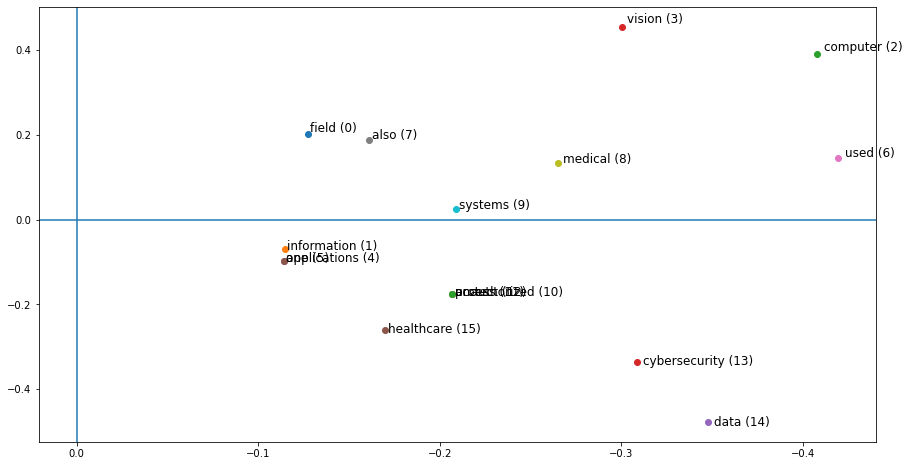

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
plt.gca().invert_xaxis()
plt.axhline(0)
plt.axvline(0)

for i in range (0, len(Uk)):
    x = Uk[i][0]
    y = Uk[i][1]
    label = [key for key, value in word_to_ix.items() if value == i]
    plt.plot(x, y, 'o')
    plt.text(x * 1.01, y*1.02, f'{label[0]} ({i})', fontsize=12)


In [52]:
print(Uk)

[[-0.12717294  0.20278638]
 [-0.11470385 -0.06974269]
 [-0.40776071  0.39028813]
 [-0.30025142  0.45516076]
 [-0.11406442 -0.09695837]
 [-0.11406442 -0.09695837]
 [-0.41909101  0.14444841]
 [-0.1610913   0.18784146]
 [-0.26503675  0.13251736]
 [-0.20868502  0.02493571]
 [-0.20656126 -0.17503165]
 [-0.20656126 -0.17503165]
 [-0.20656126 -0.17503165]
 [-0.3086385  -0.33652293]
 [-0.34760786 -0.47741341]
 [-0.16957527 -0.26134991]]


##### Expected
Note: the order of rows could be different in your implementation as it is based on the indexing of the tokens done in build_word_to_ix
```CPP
[[-0.58967885  0.70287296]
 [-1.3922137   1.57762168]
 [-0.53186185 -0.24173347]
 [-1.89071562  1.35276825]
 [-0.5288969  -0.33606505]
 [-0.5288969  -0.33606505]
 [-0.74695242  0.65107273]
 [-1.94325227  0.50066913]
 [-1.22892939  0.45931522]
 [-0.96763621  0.08642905]
 [-1.61179732 -1.65475107]
 [-0.95778872 -0.60667296]
 [-0.95778872 -0.60667296]
 [-1.43110318 -1.16641399]
 [-0.95778872 -0.60667296]
 [-0.7862911  -0.90585858]]
```
![term.png](attachment:bdb847ce-c276-45a9-a7fe-a89787bbedfa.png)

![images/term.png](images/term.png)

## <CENTER>Task-3 (10 Points)

### Find matching documents for given document

In [53]:
# Hint create query vector for input document. Calculate its cosine distance from other documents

def query(s, Uk, Sk, Vk_t, word_to_ix, documents, min_score=0.9):
    '''
    Input:
        s:query document.
        Uk:Term matrix
        Sk:singular value matrix
        Vk_t:Document matrix
        word_to_ix: {word, index} map
        documents:list of document
        min_score:min score beyond which documents are considerd matching
    Output:
        q_hat: coordinates of query vector
        matches: list of tuples containing matching document and its score
    '''
    # Add space for the matches found
    matches = []
    
    # tokenize the input document using processing script
    query_words = preprocess(s)
    
    # instantiate zeros matrix
    query_mtx = np.zeros(len(word_to_ix))
    
    # iterate over the query's words
    for word in query_words:
        
        # add word if found, increment
        if word in word_to_ix:
            query_mtx[word_to_ix[word]] += 1

    # Vector for the query s
    q_hat = np.matmul(query_mtx, Uk[:, :2])
    
    # Iterate over the documents
    for idx, document in enumerate(documents):
        
        # Check Current Document:
#         print(f"({idx})-{document}")
        
        # Preprocess each document
        d_tokens = preprocess(document)
        
        # Create zeros array
        doc_mtx = np.zeros(len(word_to_ix))
        
        # Iterate over the words
        for word in d_tokens:
            
            # If matches, increment
            if word in word_to_ix:
                doc_mtx[word_to_ix[word]] += 1
        doc_vec = np.matmul(doc_mtx, Uk[:, :2])
        
        # Calcualte cosine as dot prod
        cos_sim = np.dot(q_hat, doc_vec) / (np.linalg.norm(q_hat) * np.linalg.norm(doc_vec))
        
        # If greater than score, add to list
        if cos_sim >= min_score:
            matches.append((document, cos_sim))
    
    return q_hat, matches

q_hat, matches = query('E-commerce companies use cybersecurity to protect online transactions and prevent fraud.', Uk, Sk, Vk_t, word_to_ix, documents, 0.9)


In [118]:
q_hat, matches = query('E-commerce companies use cybersecurity to protect online transactions and prevent fraud.', Uk, Sk, Vk_t, word_to_ix, documents, 0.9)
print(q_hat)
if matches is not None:
    print(matches)
else:
    print("No matches found")

[-0.51519977 -0.51155458]
[('One of the most important applications of cybersecurity is in safeguarding sensitive data and personal information, such as financial data or healthcare records.', 0.9956454663736863), ('In the healthcare industry, cybersecurity is used to protect medical devices and prevent unauthorized access to patient data.', 0.974610647387395)]


##### Expected
```CPP
[-0.51519977 -0.51155458]
[('One of the most important applications of cybersecurity is in safeguarding sensitive data and personal information, such as financial data or healthcare records.', 0.9956454663736864), ('In the healthcare industry, cybersecurity is used to protect medical devices and prevent unauthorized access to patient data.', 0.9746106473873951)]
```

### Visual representation of query/document

In [31]:
# Plot terms, documents and query documents along with lines representing its cosine angle 

In [106]:
px1, px2, py1, py2 = get_cosine_points_pos()

In [107]:
nx1, nx2, ny1, ny2 = get_cosine_points_neg()

In [108]:
qx, qy = get_query_coords()

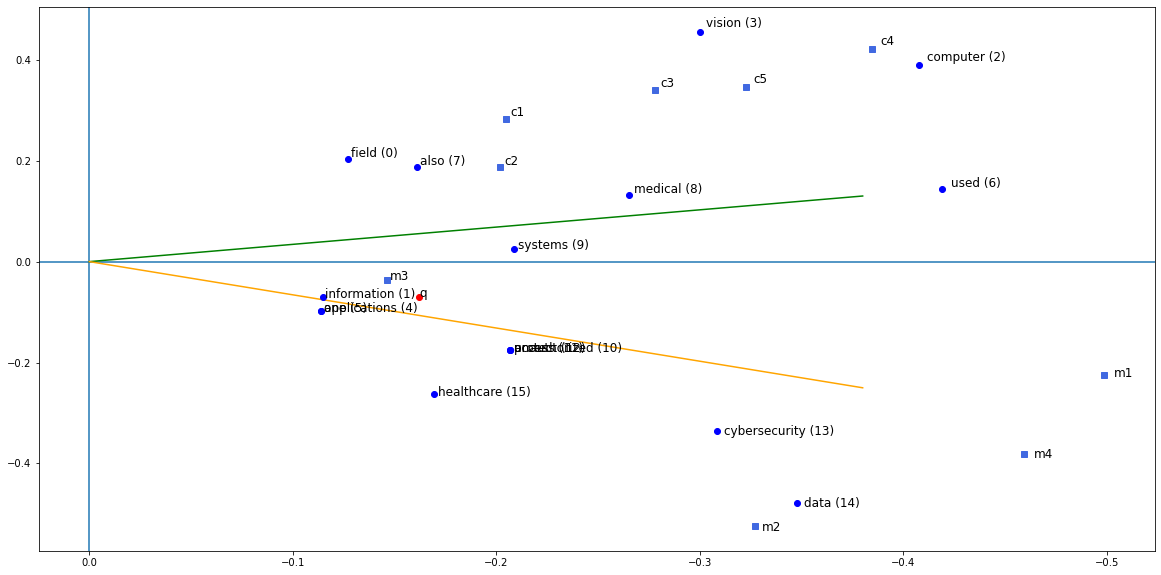

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
plt.gca().invert_xaxis()
plt.axhline(0)
plt.axvline(0)
plt.plot(qx, qy, 'o', color='red')
plt.text(qx, qy, 'q', fontsize=12)

plt.plot([px1, px2], [py1, py2], 'k-', color='green')
plt.plot([nx1, nx2], [ny1, ny2], 'k-', color='orange')

for i in range (0, len(Uk)):
    x = Uk[i][0]
    y = Uk[i][1]
    label = [key for key, value in word_to_ix.items() if value == i]
    plt.plot(x, y, 'o', color="blue")
    plt.text(x * 1.01, y*1.02, f'{label[0]} ({i})', fontsize=12)

for i in range (0, len(Vk_t)):
    x = Vk_t[i][0]
    y = Vk_t[i][1]
    plt.plot(x, y, 's', color='royalblue')
    plt.text(x * 1.01, y*1.02, docName[i], fontsize=12)

##### Expected
![Cosine angle.png](attachment:6f3fc59f-73c5-48ff-930f-9d53a78a5dd5.png)

![images/Cosineangle.png](images/Cosineangle.png)

## **Theory questions: (5 points)**
- A) Give short description of Left-eigen vectors, right-eigen vectors and eigen-values matrix retured by Singular Value Decompostion of document-terms count matrix.

    - We can define SVD as singular value decomposition as a technique that can be used to decompose a given matrix into three separate matrices which we represent above as Uk, Sk and Vk_t.
    - Uk represets the left-singular vectors or left-eigen vectors. These vectors represent a set of orthogonal vectors for the distribution of terms across the set of documents, in the form of a reduced dimensionality.
    - Sk represents the singular values, or the eigen values. These are a set of diagonal values that show the variationin the data, account for by the left and right vectors, generally used to determine important dimensions on the document term count.
    - Vk represents the right singular vectors, or right eigen vectors. These are orthogonal vectors representing distribution of documents, and are used to identify important temrs in the collection.

- B) Visually represent the document "Graph and tree generation" in 2D space along with words and documents as given in previous question.

In [122]:
q_hat, matches = query('Graph and tree generation', Uk, Sk, Vk_t, word_to_ix, documents, 0.9)
print(q_hat)
if matches is not None:
    print(matches)
else:
    print("No matches found")
    print("This will not yield any meaningful results since the coordinates are 0,0 and therefore graphing this in the graph above would not be useful")

[0. 0.]
[]


<ipython-input-53-c2bad76552b7>:57: RuntimeWarning: invalid value encountered in double_scalars
  cos_sim = np.dot(q_hat, doc_vec) / (np.linalg.norm(q_hat) * np.linalg.norm(doc_vec))


We could add a few more relevant keywords to the query document, in order to graph it using our corpus above:

In [125]:
q_hat, matches = query('Graph and tree generation in cybersecurity', Uk, Sk, Vk_t, word_to_ix, documents, 0.9)
print(q_hat)
if matches is not None:
    print(matches)
else:
    print("No matches found")
    print("This will not yield any results and therefore graphing this in the graph above would not be useful")

[-0.3086385  -0.33652293]
[('One of the most important applications of cybersecurity is in safeguarding sensitive data and personal information, such as financial data or healthcare records.', 0.9989138516575635), ('In the healthcare industry, cybersecurity is used to protect medical devices and prevent unauthorized access to patient data.', 0.9630835650829891)]


In [133]:
qx, qy = get_query_coords()

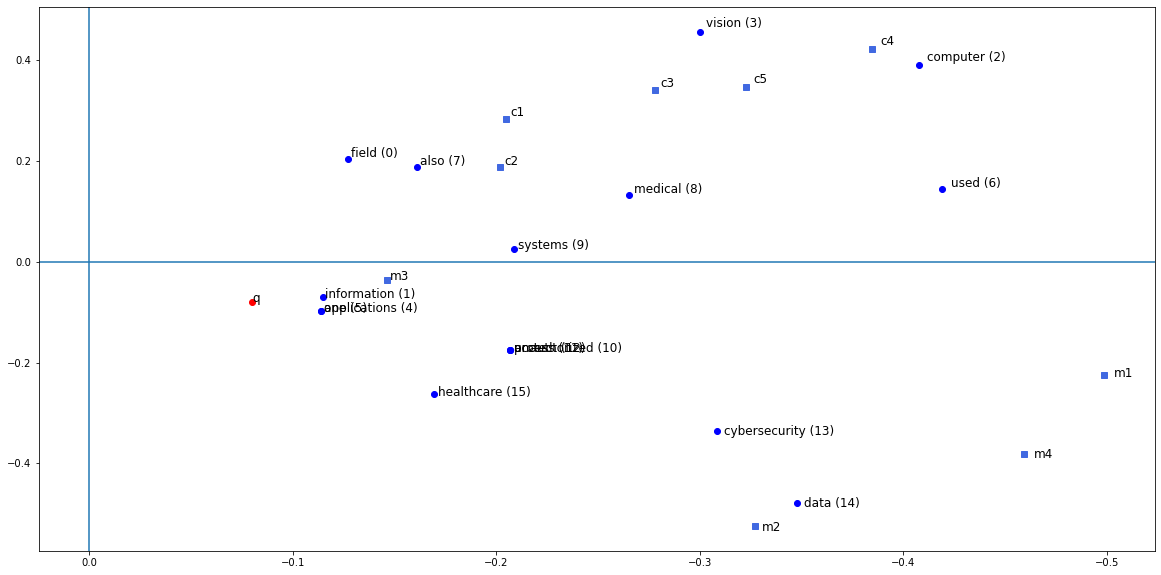

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
plt.gca().invert_xaxis()
plt.axhline(0)
plt.axvline(0)
plt.plot(qx, qy, 'o', color='red')
plt.text(qx, qy, 'q', fontsize=12)

# plt.plot([px1, px2], [py1, py2], 'k-', color='green')
# plt.plot([nx1, nx2], [ny1, ny2], 'k-', color='orange')

for i in range (0, len(Uk)):
    x = Uk[i][0]
    y = Uk[i][1]
    label = [key for key, value in word_to_ix.items() if value == i]
    plt.plot(x, y, 'o', color="blue")
    plt.text(x * 1.01, y*1.02, f'{label[0]} ({i})', fontsize=12)

for i in range (0, len(Vk_t)):
    x = Vk_t[i][0]
    y = Vk_t[i][1]
    plt.plot(x, y, 's', color='royalblue')
    plt.text(x * 1.01, y*1.02, docName[i], fontsize=12)

# Q2. n-Gram Language Models (35 points)

Your task is to train n-gram language models. [Ref SLP Chapter 3]

- Task 1: You will train unigram, bigram, and trigram models on given training files. Then you will score on given test files for unigram, bigram, and trigram. you will generate sentences from the trained model and compute perplexity.
- Task 2: You will create training data for n > 3. and Repeat the above task from training model.
<h6>Part-A = (55 Points) </h6>

In [136]:
'''
Your imports go here
You are encouraged to implement your own functions and not use from library.
'''
import sys
from collections import Counter
import numpy as np

In [137]:
# constants to define pseudo-word tokens
# access via UNK, for instance
# for this assignemnt we will follow <s> tag for beginning of sentence and
# </s> for end of senetence as suggested in SLP Book. Check sample training files for reference.
UNK = "<UNK>"
SENT_BEGIN = "<s>"
SENT_END = "</s>"

We need to initialise global variables for model

In [138]:

"""Initializes Parameters:
  n_gram (int): the n-gram order.
  is_laplace_smoothing (bool): whether or not to use Laplace smoothing
  threshold: words with frequency  below threshold will be converted to token
"""
# Initializing different object attributes
n_gram = None
is_laplace_smoothing = True
vocab = [] 
n_gram_counts = {}
n_minus_1_gram_counts = None
threshold = 1


### Implement training function (10 points)

In [139]:
def make_ngrams(tokens: list, n: int) -> list:
    """Creates n-grams for the given token sequence.
    Args:
    tokens (list): a list of tokens as strings
    n (int): the length of n-grams to create

    Returns:
    list: list of tuples of strings, each tuple being one of the individual n-grams
    """
    n_grams = []
    for i in range(len(tokens)-n+1):
        n_gram = tuple(tokens[i:i+n])
        n_grams.append(n_gram)
    return n_grams

In [140]:
make_ngrams("My name is Saleh and I lead a data science team".split(" "), 1)

[('My',),
 ('name',),
 ('is',),
 ('Saleh',),
 ('and',),
 ('I',),
 ('lead',),
 ('a',),
 ('data',),
 ('science',),
 ('team',)]

In [141]:
make_ngrams("My name is Saleh and I lead a data science team".split(" "), 2)

[('My', 'name'),
 ('name', 'is'),
 ('is', 'Saleh'),
 ('Saleh', 'and'),
 ('and', 'I'),
 ('I', 'lead'),
 ('lead', 'a'),
 ('a', 'data'),
 ('data', 'science'),
 ('science', 'team')]

In [142]:
make_ngrams("My name is Saleh and I lead a data science team".split(" "), 3)

[('My', 'name', 'is'),
 ('name', 'is', 'Saleh'),
 ('is', 'Saleh', 'and'),
 ('Saleh', 'and', 'I'),
 ('and', 'I', 'lead'),
 ('I', 'lead', 'a'),
 ('lead', 'a', 'data'),
 ('a', 'data', 'science'),
 ('data', 'science', 'team')]

In [156]:
from collections import Counter

def train(training_file_path, n):
    """Trains the language model on the given data. Input file that
    has tokens that are white-space separated, has one sentence per line, and
    that the sentences begin with <s> and end with </s>
    Parameters:
      training_file_path (str): the location of the training data to read

    Returns:
    N Gram Counts, Vocab, N Minus 1 Gram Counts
    """
    n_gram_counts = Counter()
    vocab = set()
    n_minus_1_gram_counts = Counter()

    # Read in the training file and tokenize
    with open(training_file_path, 'r') as f:
        for line in f:
            # Tokenize the line by splitting on whitespace
            tokens = line.strip().split()
            # Add <s> and </s> to the beginning and end of the sentence respectively
#             tokens = ['<s>'] + tokens + ['</s>']
            # Update the vocabulary
            vocab.update(tokens)
            # Create n-grams for the sentence
            n_grams = make_ngrams(tokens, n)
            # Update the counts
            n_gram_counts.update(n_grams)
            n_minus_1_grams = make_ngrams(tokens, n-1)
            n_minus_1_gram_counts.update(n_minus_1_grams)
    return n_gram_counts, vocab, n_minus_1_gram_counts

#### Unigram Training :

In [145]:
import itertools

In [207]:
n_gram_counts, vocab, n_minus_1_gram_counts = train("./train_data/berp-training_uni.txt", 1)

print("Examples of n_gram_counts")
print(dict(itertools.islice(n_gram_counts.items(), 5)))

print("Examples of n_gram_counts")
print(set(itertools.islice(vocab, 5)))

print("Examples of n_minus_1_gram_counts")
print(set(itertools.islice(n_minus_1_gram_counts, 5))) # Will be empty since its unigram

Examples of n_gram_counts
{('<s>',): 6756, ("let's",): 236, ('start',): 438, ('over',): 414, ('</s>',): 6756}
Examples of n_gram_counts
{"giovanni's", 'fondue', 'triple', 'wanna', 'portuguese'}
Examples of n_minus_1_gram_counts
{()}


#### Bigram Training:

Output your Trained Data Parameters:

In [220]:
n_gram_counts, vocab, n_minus_1_gram_counts = train("./train_data/berp-training_bi.txt", 2)

print("Examples of n_gram_counts")
print(dict(itertools.islice(n_gram_counts.items(), 5)))

print("Examples of n_gram_counts")
print(set(itertools.islice(vocab, 5)))

print("Examples of n_minus_1_gram_counts")
print(set(itertools.islice(n_minus_1_gram_counts, 5)))

Examples of n_gram_counts
{('<s>', "let's"): 196, ("let's", 'start'): 170, ('start', 'over'): 403, ('over', '</s>'): 367, ('<s>', 'my'): 6}
Examples of n_gram_counts
{"giovanni's", 'fondue', 'triple', 'wanna', 'portuguese'}
Examples of n_minus_1_gram_counts
{('start',), ("let's",), ('over',), ('</s>',), ('<s>',)}


#### Trigram Training:

In [217]:
n_gram_counts, vocab, n_minus_1_gram_counts = train("./train_data/berp-training-tri.txt", 3)

print("Examples of n_gram_counts")
print(dict(itertools.islice(n_gram_counts.items(), 5)))

print("Examples of n_gram_counts")
print(set(itertools.islice(vocab, 5)))

print("Examples of n_minus_1_gram_counts")
print(set(itertools.islice(n_minus_1_gram_counts, 5)))

Examples of n_gram_counts
{('<s>', '<s>', "let's"): 196, ('<s>', "let's", 'start'): 163, ("let's", 'start', 'over'): 136, ('start', 'over', '</s>'): 366, ('over', '</s>', '</s>'): 367}
Examples of n_gram_counts
{"giovanni's", 'fondue', 'triple', 'wanna', 'portuguese'}
Examples of n_minus_1_gram_counts
{('<s>', "let's"), ('over', '</s>'), ("let's", 'start'), ('<s>', '<s>'), ('start', 'over')}


### Scoring function (points 5):
Implement Score function that will take input sentence and output probability of given string representing a single sentence.

In [158]:
def score(sentence, vocab, n, n_gram_counts, n_minus_1_gram_counts, k=0.1, debug=True):
    """Calculates the probability score for a given string representing a single sentence.
    Parameters:
      sentence (str): a sentence with tokens separated by whitespace to calculate the score of
      
    Returns:
      float: the probability value of the given string for this model
    """
    tokens = sentence.split()
    log_prob = 0
    for i in range(n-1, len(tokens)):
        n_gram = tuple(tokens[i-n+1:i+1])
        n_gram_count = n_gram_counts[n_gram] + k
        n_minus_1_gram = tuple(tokens[i-n+1:i])
        n_minus_1_gram_count = n_minus_1_gram_counts[n_minus_1_gram] + k
        if n_minus_1_gram_count == k:
            # If the count of (n-1)-gram is k, it means we have not seen this context before
            # In this case, we use the count of the unigram
            unigram_count = sum(n_gram_counts[uni] for uni in n_gram_counts if uni[0] == n_gram[-1]) + k*len(vocab)
            log_prob += math.log(n_gram_count + 1 / unigram_count + len(vocab))
        else:
            log_prob += math.log((n_gram_count +1) / (n_minus_1_gram_count + len(vocab)))
    return math.exp(log_prob)


In [159]:
import math

In [160]:
score("<s> a vegetarian meal </s>", vocab, 2, n_gram_counts, n_minus_1_gram_counts, k=0.1, debug=False)

1.5048726304983363e-09

In [162]:
score("Saleh works at Amgen as a data scientist", vocab, 2, n_gram_counts, n_minus_1_gram_counts, k=0.1, debug=False)

0.0005579225084999843

In [161]:
score("I am going to work", vocab, 2, n_gram_counts, n_minus_1_gram_counts, k=0.1, debug=False)

1.2024373757362843e-06

#### Unigram Scoring:

In [208]:
with open("test_data/hw2-test_uni.txt", 'r') as fh:
    test_content = fh.read().split("\n")
num_sentences_1 = len(test_content)
ten_sentences_1 = test_content[:10]
print("# of test sentences: ", num_sentences_1)
probablities = []

# of test sentences:  100


In [209]:
# print probabilities/score of sentences in test content
for sentence in test_content:
    probablities.append(score(sentence, vocab, 1, n_gram_counts, n_minus_1_gram_counts, k=0.1, debug=False))
probablities = np.array(probablities)
mean = np.mean(probablities)
std_dev = np.std(probablities)

print(mean)
print(std_dev)

9.970361046407934e-07
6.388290374629924e-06


In [210]:
probablities

array([1.92756193e-10, 1.17531654e-09, 1.71931755e-20, 6.85744227e-18,
       2.49898987e-23, 2.07631737e-18, 1.06672468e-15, 5.82554535e-31,
       1.58886722e-25, 3.51534421e-07, 5.68125863e-11, 6.08330367e-15,
       2.72973073e-18, 4.06727784e-08, 1.23418250e-12, 5.82441550e-08,
       1.91000369e-05, 6.54230358e-08, 5.51463293e-21, 1.04753240e-24,
       8.86828045e-43, 8.55831996e-44, 9.00210999e-28, 2.44672134e-21,
       9.01615173e-23, 1.34598068e-13, 6.18115302e-09, 1.98181931e-11,
       2.39476247e-26, 1.80355184e-17, 1.21381855e-15, 3.51659596e-22,
       6.36266453e-24, 6.79322278e-16, 4.79485101e-22, 2.90546467e-25,
       6.82064764e-15, 2.09514997e-16, 1.95197559e-21, 5.16048698e-14,
       7.74621987e-18, 1.15634442e-19, 3.21657439e-18, 3.83727604e-21,
       8.81341652e-23, 1.85205664e-23, 3.20002984e-11, 8.27443593e-11,
       5.96951757e-23, 9.22037723e-23, 2.93887666e-24, 7.57854165e-21,
       5.72254404e-10, 1.72007823e-09, 1.72007823e-09, 4.88346204e-16,
      

#### Bigram Scoring:

In [235]:
with open("test_data/hw2-test_bi.txt", 'r') as fh:
    test_content = fh.read().split("\n")
num_sentences_1 = len(test_content)
ten_sentences_1 = test_content[:10]
print("# of test sentences: ", num_sentences_1)
probablities = []

# of test sentences:  100


In [236]:
# print probabilities/score of sentences in test content
for sentence in test_content:
    probablities.append(score(sentence, vocab, 2, n_gram_counts, n_minus_1_gram_counts, k=0.1, debug=False))
probablities = np.array(probablities)
mean = np.mean(probablities)
std_dev = np.std(probablities)


print(mean)
print(std_dev)

2.49021841924635e-05
0.0001559681357600102


In [237]:
probablities

array([1.50487263e-09, 3.93725789e-08, 5.33532327e-17, 1.25711631e-14,
       6.40215880e-20, 1.35214587e-13, 7.22556292e-13, 1.73514405e-20,
       2.28297148e-17, 1.05884818e-07, 1.29361926e-09, 3.30461782e-11,
       1.09327845e-14, 1.00880188e-05, 5.99453573e-12, 5.21004683e-06,
       1.82246246e-05, 2.89645958e-06, 1.95809477e-13, 1.12147721e-21,
       3.25026870e-35, 4.36172012e-24, 4.05058028e-20, 5.27987858e-19,
       4.40606311e-17, 2.00582274e-10, 3.57607780e-06, 6.09945013e-10,
       1.06133799e-21, 1.29819804e-12, 1.09575220e-09, 4.49262884e-16,
       2.01917131e-14, 1.32947220e-11, 4.83304850e-18, 2.12504516e-16,
       2.51899329e-08, 1.22468499e-08, 1.74452035e-14, 1.43473659e-10,
       8.48823863e-14, 1.11506001e-12, 4.99859244e-12, 1.52418880e-17,
       1.65100569e-16, 1.73926721e-16, 4.38072565e-11, 2.23150686e-10,
       6.64978942e-18, 3.97439387e-20, 2.96464567e-23, 5.51174569e-15,
       3.30486212e-06, 1.12737541e-04, 1.12737541e-04, 4.25966297e-13,
      

#### Trigram Scoring

In [176]:
with open("test_data/hw2-test-tri.txt", 'r') as fh:
    test_content = fh.read().split("\n")
num_sentences_1 = len(test_content)
ten_sentences_1 = test_content[:10]
print("# of test sentences: ", num_sentences_1)
probablities = []

# of test sentences:  102


In [177]:
# print probabilities/score of sentences in test content
for sentence in test_content:
    probablities.append(score(sentence, vocab, 3, n_gram_counts, n_minus_1_gram_counts, k=0.1, debug=False))
probablities = np.array(probablities)
mean = np.mean(probablities)
std_dev = np.std(probablities)


print(mean)
print(std_dev)

66.09319253493008
618.0515625366791


In [178]:
probablities

array([8.65415895e-13, 4.35116532e-11, 1.16948477e-15, 4.66094509e-18,
       1.66162627e-25, 9.52261497e-17, 4.22341862e-17, 3.15672817e-06,
       3.83276905e-16, 2.64382488e+02, 1.81249460e-06, 2.88261459e-08,
       1.79006756e-17, 9.42607089e-08, 2.77292625e-16, 2.92079130e-08,
       5.57976122e-08, 7.90611241e-09, 1.84113726e-17, 6.83699156e-07,
       7.78718314e-13, 5.80627873e-12, 7.64020361e-20, 1.59125701e-05,
       5.61251085e-15, 2.83548048e-14, 1.74335155e-08, 2.42533838e-13,
       8.84514196e-21, 2.52476513e-17, 7.50697436e-13, 1.82895727e-22,
       5.41221432e-18, 1.00480798e-15, 1.64590392e-23, 1.37570389e-21,
       7.98962782e-11, 4.22685836e-11, 1.54129195e-11, 6.65154018e-14,
       7.41673477e-18, 2.88152224e-16, 2.44306559e-15, 7.76679428e-16,
       3.84720127e-14, 1.95866785e-13, 6.12026944e-08, 2.45396653e-14,
       4.04967981e-16, 1.97651262e-25, 7.90391834e-15, 2.39418491e-19,
       7.86869876e-08, 9.20093513e-06, 9.20093513e-06, 1.46979354e-17,
      

### Sentence generation (10 points)
Generate sentence from the above trained model
- To generate next word from a set of probable n-grams and their probabilities check below tutorial:
https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html

In [200]:
def generate_sentence(n):
    """Generates a single sentence from a trained language model using the Shannon technique.
      
    Returns:
      str: the generated sentence
    """
    # Start with <s> and randomly generate words until we encounter sentence end
    # Append sentence begin markers for n>2
    # Keep track of previous word for stop condition
    
    sentence = ""
    prev_word = "<s>"
    sentence += "<s> " * max(n - 1, 1)
    
    if n > 1:
        while prev_word != "</s>":
            
            # Construct the (n-1) gram so far
            
            gram = sentence.split()[-(n - 1):]
#             print(sentence)
#             print(gram)
            
            # Get the counts of all available choices based on n-1 gram
            avail_choice = {}
            for key in n_gram_counts:
#                 print(key[:-1])
                if key[:-1] == tuple(gram):
#                     print(key)
                    
                    avail_choice[key[-1]] = n_gram_counts[key]
#             print(avail_choice)
            
            # Convert the counts into probability for random.choice() function
            values = np.array(list(avail_choice.values())) / np.sum(np.array(list(avail_choice.values())))
#             print(values)
#             print(avail_choice.keys())
            probs = np.random.choice(list(avail_choice.keys()), p=values)
            
            
        
            # If <s> is generated, ignore and generate another word
            if probs == "<s>":
                continue
            
            sentence += (" " + probs)
            
            prev_word = probs
#             print("gram", gram)
#             print("############################################")
    else:
      # In case of unigram model, n-1 gram is just the previous word and possible choice is whole vocabulary
        while prev_word != "</s>":
#             continue
            avail_choice = n_gram_counts
            values = np.array(list(avail_choice.values())) / np.sum(np.array(list(avail_choice.values())))
            
            probs = np.random.choice(list(avail_choice.keys()), p=values)
            
            if probs == "<s>":
                continue
                
            sentence += (" " + probs)
            
            prev_word = probs
            
        # Convert the counts into probability for random.choice() function
        # If <s> is generated, ignore and generate another word

    # Append sentence end markers for n>2
    
    sentence += "</s> " * max(n - 2, 0)
    
    return sentence

In [201]:
x = generate_sentence(2) 

In [202]:
x

"<s>  i'd like to go there a french food </s>"

In [203]:
def generate(n, m):
    """Generates n sentences from a trained language model using the Shannon technique.
    Parameters:
      n (int): the number of sentences to generate
      m (int): gram of generator
      
    Returns:
      list: a list containing strings, one per generated sentence
    """
    # Generate sentences one by one and store
    sentences = []
    
    for i in range(n):
#         temp_sent = generate_sentence(m)
        sentences.append(generate_sentence(m))
        
    return sentences

In [204]:
sentence = ""
sentence += "<s> " * max(2 - 1, 1)

In [205]:
sentence.split()

['<s>']

#### Unigram Sentence Generation:

In [215]:
sentences = generate(50, 1)
print("Sentences:")
for sentence in sentences:
    print(sentence)

Sentences:
<s>  not plearn's </s>
<s>  one hour </s>
<s>  i see the list </s>
<s>  it </s>
<s>  okay shows me about taqueria de la-paz </s>
<s>  i do you show me a soup kitchen heike </s>
<s>  i could you have lunch and i'm looking for </s>
<s>  the information about the price range may i would like to go for finding a cheap and the list ethiopian restaurants please </s>
<s>  okay three dollars </s>
<s>  not cost </s>
<s>  i'd like to have to have within a half an american food </s>
<s>  what about the list of time </s>
<s>  less than fifteen minutes' walk three minutes from icsi </s>
<s>  german restaurant is best chinese food </s>
<s>  what it's possible </s>
<s>  close to travel further than twenty dollars </s>
<s>  i would like to have lunch </s>
<s>  looking for a pretty close to go for fat apple's </s>
<s>  i want to bike </s>
<s>  it i'd like to travel any kind of food and i'd like it doesn't matter </s>
<s>  this </s>
<s>  tell me about cafe located ten minutes </s>
<s>  it met

#### Bigram Sentence Generation:

In [259]:
sentences = generate(50, 2)
print("Sentences:")
for sentence in sentences:
    print(sentence)

Sentences:
<s>  okay show italian </s>
<s>  is wednesday </s>
<s>  uh breakfast today </s>
<s>  the great china </s>
<s>  tell me back to go to have lunch during the cost doesn't matter </s>
<s>  tell me information about guerrero's </s>
<s>  i would like food </s>
<s>  indian food doesn't matter </s>
<s>  do you have indian food at somewhere a nice </s>
<s>  what's caffe giovanni </s>
<s>  not really matter </s>
<s>  i want to go there any of dishes </s>
<s>  tell me more than ten dollars there is same case are available </s>
<s>  which are they serve </s>
<s>  what is the list of distance from icsi </s>
<s>  cafe </s>
<s>  not chinese restaurant </s>
<s>  does chez-panisse </s>
<s>  uh icsi </s>
<s>  not matter </s>
<s>  to spend less expensive restaurant </s>
<s>  i don't wanna have chinese food please </s>
<s>  sunday </s>
<s>  tell me a german restaurants serving bad </s>
<s>  tell me about sun-hong-kong serve there any day of a restaurant in the list the price of the united state

#### Trigram Sentence Generation:

In [221]:
sentences = generate(50, 3)
print("Sentences:")
for sentence in sentences:
    print(sentence)

Sentences:
<s>  how about the available in california food </s>
<s>  no more information on the area </s>
<s>  let's start over </s>
<s>  uh start over </s>
<s>  and chips zachary's pizza </s>
<s>  could be on the type of restaurants now </s>
<s>  i prefer is okay as close </s>
<s>  i don't know of any area </s>
<s>  indonesian restaurants in berkeley </s>
<s>  i would like to have lunch </s>
<s>  the price </s>
<s>  not much for sushi </s>
<s>  i am interested in berkeley </s>
<s>  i would be not much you've been really don't want to icsi </s>
<s>  uh i'd like to go to have dinner </s>
<s>  to spend ten dollars </s>
<s>  tell me the distance to go to go for dinner not very fast food to spend more information on north african food is the first restaurant </s>
<s>  actually it walking distance doesn't matter </s>
<s>  tell me more than fifty dollars </s>
<s>  i have about the indian restaurants serving a restaurant </s>
<s>  i want to eat tuesday </s>
<s>  what i have inexpensive </s>
<

### Evaluate model perplexity (5 points)
Measures the perplexity for the test sequence with your trained model. 
you may assume that this sequence may consist of many sentences "glued together"

The perplexity of the given sequence is the inverse probability of the test set, normalized by the number of words.


In [232]:
# Since this sequence will cross many sentence boundaries, we need to include 
# the begin- and end-sentence markers <s> and </s> in the probability computation. 
# We also need to include the end-of-sentence marker </s> 
# but not the beginning-of-sentence marker <s>) in the total count of word tokens N

def perplexity(test_sequence, vocab, n, n_gram_counts, n_minus_1_gram_counts, k=0.1, debug=True):
    """.
    Parameters:
      test_sequence (string): a sequence of space-separated tokens to measure the perplexity of

    Returns:
      float: the perplexity of the given sequence
    """ 

    # Replace out of vocab words with <UNK>, already done in score function
    # test_sequence = [token if token in vocab else UNK for token in test_sequence.split()]
    # Remove sentence begin markers from data for computing N
    sentences = test_sequence.strip().split('</s> <s>')
    N = sum(len(sentence.split()) - 1 for sentence in sentences)
    
    # Get the probability for the sequence
    log_prob_sum = 0
    for sentence in sentences:
        sentence = '<s> ' + sentence.strip() + ' </s>'
        log_prob_sum += math.log(score(sentence, vocab, n, n_gram_counts, n_minus_1_gram_counts, k, debug))

    
    perplexity = 2 ** (-1 / N * log_prob_sum)
    
    return perplexity

##### Unigram:

In [241]:
print(perplexity(" ".join(sentences[0:10]), vocab, 1, n_gram_counts, n_minus_1_gram_counts, k=0.1, debug=True))

135.71256259824693


##### Bigram:

In [260]:
print(perplexity(" ".join(sentences[0:10]), vocab, 2, n_gram_counts, n_minus_1_gram_counts, k=0.1, debug=True))

87.96717929361927


##### Trigram:

In [253]:
print(perplexity(" ".join(sentences[0:10]), vocab, 3, n_gram_counts, n_minus_1_gram_counts, k=0.1, debug=True))

76.76909551297624


In [240]:
#print(perplexity(" ".join(sentences[0:10])))

78.4934782125397

### **Explore and explain: (5 points)**
* Experiment n_gram model for n = [1,2,3..7] of your choice. Explain the best choice of n that generates more meaninful sentences.

    - I tested code on models with n = 1, 2, 3, 4, 5, 6, 7
    - Best performance, based on the most meaningful sentences was n=2 or n=3
    - Based on observed perplexity alone, unigram seems to have the highest whereas trigram is lowest
    - This observation in perplexity seems reasonable given that the corpus is limited and the average sentence is about 10 or so words
    - Larger n-gram models appear to have memorized the sentences more than others
    - Smaller n-gram models did not have enough history to 'remember'
    - In summary, n=2 or n=3 was sufficient for this corpus


In [261]:
n_gram_counts, vocab, n_minus_1_gram_counts = train("./train_data/berp-training_bi.txt", 2)

print("Examples of n_gram_counts")
print(dict(itertools.islice(n_gram_counts.items(), 5)))

print("Examples of n_gram_counts")
print(set(itertools.islice(vocab, 5)))

print("Examples of n_minus_1_gram_counts")
print(set(itertools.islice(n_minus_1_gram_counts, 5)))

Examples of n_gram_counts
{('<s>', "let's"): 196, ("let's", 'start'): 170, ('start', 'over'): 403, ('over', '</s>'): 367, ('<s>', 'my'): 6}
Examples of n_gram_counts
{"giovanni's", 'fondue', 'triple', 'wanna', 'portuguese'}
Examples of n_minus_1_gram_counts
{('start',), ("let's",), ('over',), ('</s>',), ('<s>',)}


In [262]:
with open("test_data/hw2-test_bi.txt", 'r') as fh:
    test_content = fh.read().split("\n")
num_sentences_1 = len(test_content)
ten_sentences_1 = test_content[:10]
print("# of test sentences: ", num_sentences_1)
probablities = []

# of test sentences:  100


In [263]:
# print probabilities/score of sentences in test content
for sentence in test_content:
    probablities.append(score(sentence, vocab, 2, n_gram_counts, n_minus_1_gram_counts, k=0.1, debug=False))
probablities = np.array(probablities)
mean = np.mean(probablities)
std_dev = np.std(probablities)


print(mean)
print(std_dev)

2.49021841924635e-05
0.0001559681357600102


In [269]:
sentences = generate(5, 2)
print("Sentences:")
for sentence in sentences:
    print(sentence)

Sentences:
<s>  start again </s>
<s>  i'm willing to eat a cuban food </s>
<s>  i would like a sunday </s>
<s>  i wanna know about um french food does not to go for lunch </s>
<s>  i don't eat american breakfast in dinner on oriental </s>


# Q3. Classification using LSTM - using Tensorflow (30 Points)
In this part, we will be building a bidirectional LSTM network to train and inference sentiment analysis on IMDB dataset.<br>

If you need a refresher or have never worked with Neural Networks before, here are a few resources:
- https://web.stanford.edu/~jurafsky/slp3/7.pdf
- https://web.stanford.edu/~jurafsky/slp3/9.pdf
- https://colah.github.io/posts/2015-08-Understanding-LSTMs/


Training a neural network model will take time. 
- You can use Google Colab / Kaggle notebooks. You get a free GPU for a limited time to tweak your hyperparameters.
- Without a GPU, You might have to wait longer to experiment.

### Library Imports

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
# import tensorflow_datasets as tfds

# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.preprocessing.text import Tokenizer



C:\Users\Saleh Alkhalifa\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Saleh Alkhalifa\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\Saleh Alkhalifa\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [27]:
!pip show tensorflow

Name: tensorflow
Version: 2.10.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\saleh alkhalifa\appdata\roaming\python\python38\site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, keras-preprocessing, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: autokeras


### Visualizing data distribution (1 Point)


In [257]:
## Reading the data and removing columns that are not important. 
dataset = pd.read_csv("data/movie_reviews-2.csv", sep = ',', encoding = 'latin-1', usecols = lambda col: col not in ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"])

In [258]:
#######################################################   
# print head of data frame with help of head function # 
#######################################################

dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,"Petter Mattei's ""Love in the Time of Money"" is...",positive
4,"Probably my all-time favorite movie, a story o...",positive


C:\Users\Saleh Alkhalifa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


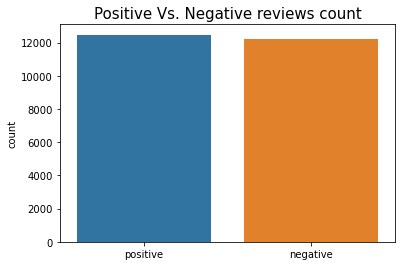

In [259]:
####################################################### 
# plot Positive Vs. Negative reviews count            # 
#######################################################

sns.countplot(dataset["sentiment"].values)

plt.title("Positive Vs. Negative reviews count", fontsize = 15)
plt.show()



### Cleaning the Reviews (2 Points)

In [260]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string
import pandas as pd
import re
import nltk
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')

stopword = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
words = set(nltk.corpus.words.words())

# From the first assignment
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"www.\S+", "", text)
    text_links_removed = "".join([char for char in text if char not in string.punctuation])
    text_cleaned = " ".join([word for word in re.split('\W+', text_links_removed)
        if word not in stopword])
    text = " ".join([wn.lemmatize(word) for word in re.split('\W+', text_cleaned)])
    return text

[nltk_data] Downloading package omw-1.4 to C:\Users\Saleh
[nltk_data]     Alkhalifa\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Saleh
[nltk_data]     Alkhalifa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Saleh
[nltk_data]     Alkhalifa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to C:\Users\Saleh
[nltk_data]     Alkhalifa\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [261]:
#############################################################################################  
# Clean all the reviews in the dataset using the clean_text function provided above         # 
############################################################################################# 

dataset["cleaned_review"] = dataset["review"].apply(clean_text)


In [262]:
#####################################################################
# print head of the "CLEANED" data frame with help of head function # 
#####################################################################
 
dataset.head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one reviewer mentioned watching 1 oz episode y...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production br br filming tech...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...
4,"Probably my all-time favorite movie, a story o...",positive,probably alltime favorite movie story selfless...


### Splitting the dataset and Encoding Labels (2 Points)

Spliting data: <br> 
80% for the training and the remaining 20% for validation.

Encoding Labels: <br>
Encode labels as negative and positive as 0 and 1 respectively


In [263]:
dataset.shape

(24699, 3)

In [264]:
# dataset = dataset.sample(5000)

In [265]:
dataset.shape

(24699, 3)

In [266]:
#################################################################################
# Split the data using the sklearn module                                       #
# 80% for the training and the remaining 20% for validation                     #
#################################################################################
from sklearn.model_selection import train_test_split

X = dataset["cleaned_review"].values
y = dataset["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

print(X_train.shape)
print(X_test.shape)

(19759,)
(4940,)


In [267]:
#################################################################################
# Initialize label encoder from sklearn module                                  #
# fit on train labels and transform both train and validation labels            #
#################################################################################
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)

print(y_test[:5])
y_test = encoder.transform(y_test)

print(y_test[:5])

14908    positive
16995    positive
11010    negative
2588     positive
8266     negative
Name: sentiment, dtype: object
[1 1 0 1 0]


### Pre-Processing The Text (5 Points)
 

In [268]:
# You can use the modules given below
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

###############################################################################  
# Fit your tokenizer on the training reviews                                  #
###############################################################################

num_words = 10000
tokenizer = Tokenizer(num_words=num_words)

tokenizer.fit_on_texts(X_train) 
# train_sequences = tokenizer.texts_to_sequences(X_train)
# val_sequences = tokenizer.texts_to_sequences(X_test)

#################################################################################################
# The word_index dictionary assigns a unique index to each unique word present in the training  #
# reviews.                                                                                      #
#                                                                                               #
# Create the word_index dictionary using the tokenizer                                          #
# Find the vocabulary of your training reviews                                                  #
#################################################################################################

# word_index = {}
word_index = tokenizer.word_index

word_counts = dict(tokenizer.word_counts)
vocabulary = set(word_counts.keys())


#################################################################################################
# Convert the reviews in the dataset to their index form by using a function available          #
# with the tokenizer                                                                            #
# HINT : convert training and validation reviews into sequences                                 #
#################################################################################################

train_sequences = tokenizer.texts_to_sequences(X_train)
val_sequences = tokenizer.texts_to_sequences(X_test)

#################################################################################################
# Pad the the training and validation sequences so all of them have the same length             # 
# set maxlen = 200                                                                              #
#################################################################################################

# maxlen which is the maximum length of one review we will use for our training

maxlen = 200

train_sequences = pad_sequences(train_sequences, maxlen=maxlen)
val_sequences = pad_sequences(val_sequences, maxlen=maxlen)


print('Vocabulary : {}'.format(len(vocabulary))) #Using len() instead to avoid flooding the page

Vocabulary : 100159


### Using glove vectors for embedding (5 Points)

GloVe vectors capture both global statistics and local statistics of a corpus. We use GloVe to convert words to embeddings in the vector space based on their semantics. 

We will be using the 200-dimensional GloVe vectors for the task at hand.

To learn more about GloVe please read the following resource:
- https://nlp.stanford.edu/pubs/glove.pdf

In [269]:
glove_dictionary = {}
with open('glove.6B.200d.txt', encoding="utf8") as file:
    for each_line in file:
        words_in_line, coeff_cients = each_line.split(maxsplit=1)
        coeff_cients = np.array(coeff_cients.split(),dtype = float)
        glove_dictionary[words_in_line] = coeff_cients

In [270]:
 # All the words which are not in the GloVe dictionary will be assigned a zero vector.

# embedding_matrix = np.zeros((vocabulary, 200))

######################################################################
# The glove_dictionary contains words vs their respective embeddings #
#                                                                    #
# Create the embedding matrix using the glove_dictionary             #
######################################################################

embedding_matrix = np.zeros((num_words, 200))

for word, i in word_index.items():
    if i >= num_words:
        continue
    embedding_vector = glove_dictionary.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
    else:
        embedding_matrix[i] = np.random.randn(200)

In [271]:
embedding_matrix.shape

(10000, 200)

Sample output : (99987, 200)

### Creating The Model (10)

If you need a refresher or have never worked with Neural Networks before, here are a few resources:
- https://web.stanford.edu/~jurafsky/slp3/7.pdf
- https://web.stanford.edu/~jurafsky/slp3/9.pdf
- https://colah.github.io/posts/2015-08-Understanding-LSTMs/


Training a neural network model will take time. 
- You can use Google Colab / Kaggle notebooks. You get a free GPU for a limited time.
- Without a GPU, You might have to wait longer to experiment.


Useful resources : <br>
https://www.tensorflow.org/api_docs/python/tf/keras/Sequential <br>
https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense <br>
https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout <br>





In [272]:
import tensorflow as tf

tf.random.set_seed(42)

######################################################
# Complete this linear model in tensorflow           #
######################################################

def build_model(embedding_matrix):

    ''' 
    Arguments:
    embedding_matrix : a matrix with the corresponding embeddings
    of all words.

    Returns:
    The LSTM model that you created.
    '''

    model = tf.keras.Sequential()

    # TO DO: layer 1 : add embedding layer
    # The embedding layer maps the words to their embedding vectors from the embedding matrix
    model.add(tf.keras.layers.Embedding(input_dim=embedding_matrix.shape[0],
                                        output_dim=embedding_matrix.shape[1],
                                        weights=[embedding_matrix],
                                        trainable=False))

    # TO DO: layer 2 : add Bidirectional LSTM Layer 
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=128)))


    # TO DO Add more layers : you can add more dense layers and dropout
    # NOTE : You should be able to achieve an validation accuracy greater than 85%
    #        within 10 epochs
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(units=64, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.2))


    # TO DO Final layer : add output layer and activation 
    model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

    # TO DO : use a loss function, optimizer as adam to compile 
    # and evaluate model on auc,precision,recall,accuracy
    # HINT : choose your loss function based on the task (binary classification)
    model.compile(loss='binary_crossentropy', optimizer='adam',
                  metrics=[tf.keras.metrics.AUC(name="auc"), tf.keras.metrics.Precision(name="precision"),
                           tf.keras.metrics.Recall(name="recall"), 'accuracy'])
  
    return model

In [273]:
# y_train = y_train.reshape((-1,1))
# y_test = y_test.reshape((-1,1))

In [274]:
# NOTE : You should be able to achieve an validation accuracy greater than 85%
#        within 10 epochs

#################################################################
# Call the build_model function and initialize the model        #
#################################################################

model = build_model(embedding_matrix)
model.summary()

#######################################################################################################
# train and validate the model on the padded sequences of text which we have created initially        #
#######################################################################################################

history = model.fit(train_sequences, y_train, epochs=10,
                    validation_data=(val_sequences, y_test))
# history = model.fit(train_sequences, y_train, epochs=10)

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_23 (Embedding)    (None, None, 200)         2000000   
                                                                 
 bidirectional_23 (Bidirecti  (None, 256)              336896    
 onal)                                                           
                                                                 
 dropout_46 (Dropout)        (None, 256)               0         
                                                                 
 dense_46 (Dense)            (None, 64)                16448     
                                                                 
 dropout_47 (Dropout)        (None, 64)                0         
                                                                 
 dense_47 (Dense)            (None, 1)                 65        
                                                     

### Plotting Accuracy and Losses (5 Points)
 




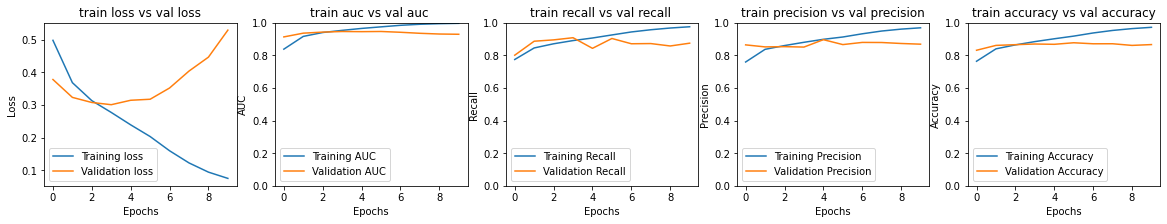

In [276]:
####################################
# PLOT :                           #
# train loss vs val loss           #
# train auc vs val auc             #
# train recall vs val recall       #
# train precision vs val precision #
# train accuracy vs val accuracy   #
####################################

plt.figure(figsize=(20,3))

# Plot subplot 1 with loss
plt.subplot(1, 5, 1)
plt.title("train loss vs val loss")
plt.plot(history.history['loss'], label = 'Training loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")

# Plot subplot 2 with auc
plt.subplot(1, 5, 2)
plt.ylim(0, 1)
plt.title("train auc vs val auc ")
plt.plot(history.history['auc'], label = 'Training AUC')
plt.plot(history.history['val_auc'], label = 'Validation AUC')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("AUC")

# Plot subplot 3 with recall
plt.subplot(1, 5, 3)
plt.ylim(0, 1)
plt.title("train recall vs val recall ")
plt.plot(history.history['recall'], label = 'Training Recall')
plt.plot(history.history['val_recall'], label = 'Validation Recall')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Recall")

# Plot subplot 4 with recall
plt.subplot(1, 5, 4)
plt.ylim(0, 1)
plt.title("train precision vs val precision")
plt.plot(history.history['precision'], label = 'Training Precision')
plt.plot(history.history['val_precision'], label = 'Validation Precision')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Precision")

# Plot subplot 5 with recall
plt.subplot(1, 5, 5)
plt.ylim(0, 1)
plt.title("train accuracy vs val accuracy")
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [277]:
# You will need to include the pickled model along with the other submission files
# The saved model will be used to verify your lstm's predictions on hidden reviews

##################################################################################
# Save your trained model as a pickle file named "lstm_classifier"               #
# You will be using this saved model to make predictions in the next module      #
##################################################################################

# import pickle

# with open("lstm_classifier.pkl", "wb") as f:
#     pickle.dump(model, f)

path = './lstm_classifier.h5'
model.save(path)


### Prediction (5 Points)

In [235]:
######################################################################
# Load your saved model                                              #
# Use the saved model to make predictions                            #
######################################################################

# with open("lstm_classifier.pkl", "rb") as f:
#     saved_model = pickle.load(f)

saved_model= tf.keras.models.load_model(path)


In [254]:
# use the saved model to predict the reviews
def predict_review(review):
    '''
    Arguments:
    review : A single review for which you want to predict the sentiment for.
    example: "This movie was amazing! I would defenitely watch it again."

    Returns:
    The predicted sentiment for the review : either 1 or 0
    '''

    ############################################################################# 
    # Predict the sentiment for the given review using the model                #
    # that you trained and return the sentiment                                 #
    #                                                                           #
    # HINT : Remember that the review needs to be "preprocessed" before you use #
    # it for prediction                                                         #
    #############################################################################

    clean_review = clean_text(review)
    new_review_sequence = tokenizer.texts_to_sequences([clean_review])
    new_review_sequence_padded = pad_sequences(new_review_sequence, maxlen=200)

    y_pred = saved_model.predict(new_review_sequence_padded)
    
#     print(y_pred)

    y_pred_labels = int(np.round(y_pred).astype(int))

    return y_pred_labels


In [256]:
# Do not edit this cell

for review in ["If you like original gut wrenching laughter you will like this movie. If you are young or old then you will love this movie, hell even my mom liked it.<br /><br />Great Camp!!!",
                "What a waste of talent. A very poor, semi-coherent, script cripples this film. Rather unimaginative direction, too. Some VERY faint echoes of Fargo here, but it just doesn't come off.",
                "I have seen this film at least 100 times and I am still excited by it, the acting is perfect and the romance between Joe and Jean keeps me on the edge of my seat, plus I still think Bryan Brown is the tops. Brilliant Film.",
                "Cheap, amateurish, unimaginative, exploitative... but don't think it'll have redeeming amusement value. About as unentertaining, uninstructive and just plain dull as a film can be."]:
    p = predict_review(review)
    print(f'{review[:100]} -> {p}')
    

1/1 [==============================] - 0s 24ms/step
If you like original gut wrenching laughter you will like this movie. If you are young or old then y -> 1
1/1 [==============================] - 0s 23ms/step
What a waste of talent. A very poor, semi-coherent, script cripples this film. Rather unimaginative  -> 0
1/1 [==============================] - 0s 22ms/step
I have seen this film at least 100 times and I am still excited by it, the acting is perfect and the -> 1
1/1 [==============================] - 0s 22ms/step
Cheap, amateurish, unimaginative, exploitative... but don't think it'll have redeeming amusement val -> 0


### Expected Output:

If you like original gut wrenching laughter you will like this movie. If you are young or old then y -> 1 <br>
What a waste of talent. A very poor, semi-coherent, script cripples this film. Rather unimaginative  -> 0 <br>
I have seen this film at least 100 times and I am still excited by it, the acting is perfect and the -> 1 <br>
Cheap, amateurish, unimaginative, exploitative... but don't think it'll have redeeming amusement val -> 0